# Introduction

This module focuses on using a Convolutional Neural Network (CNN), or Deep Learning Models as they are sometimes called, to classify images.  CNN’s are quite good at performing classification tasks; however, they require a significant amount of labeled training data and are also uninterpretable.  

During this module we will build our neural network on a publicly available (but not very interesting) dataset.  This is because the dataset is pre-packaged and ready to use in the Google Collab environment.  This avoids any of the many problems that frequently arise when we need to move large amounts of data around in the cloud.

There are three primary phases involved with using neural networks for classification.  First, you must load two sets of data:  a labeled training set and a test set.  The labeled training set consists of several thousand identified images of each class into which you ultimately want to classify your images.  The test set consists of all the images for which you want to know the class. 

Next, you must setup and configure the neural network infrastructure.  Thanks to publicly available packages like Tenserflow, this can now be done with only a few lines of code. 

Once you have loaded your data, you must train the network.  This involves feeding into the neural network a collection of labelled training data.  For example, if I were trying to train a neural network to distinguish between cats and dogs, I would give it several thousand example cat pictures and then several thousand example dog pictures.  The CNN would then “learn” the difference between cats and dogs from these pictures.

Finally, once we have trained our CNN, we can than give it novel images and ask it to classify them.  As stated earlier, CNN’s are quite good at this task.  However, they provide us no information about how they arrive at their conclusions; so there is no way to interrogate them the way we do other statistical models.  This is why people often refer to neural networks as a “black box,” and it is also why they are only appropriate as digital humanities tool when we have no desire to do such an interrogation and care only about the classification outcome. 


# Setup Python Environment

Befire we can begin setting up our CNN, we must import necessarh packages and modules

In [1]:
# import TensorFlow package
# https://www.tensorflow.org/
import tensorflow as tf

# import numpy
# https://numpy.org/
import numpy as np

# import matplotlib
# https://matplotlib.org/
import matplotlib.pyplot as plt

# Load the MNIST Fashion Dataset

Now that we have our enironment ready, we can start loding and preprocessign our data.  For this exercise, we will work with the opensource [MNIST Fashion Dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist), becase it is already available on Google Collab. Loading the dataset returns four NumPy arrays:

*   The train_images and train_labels arrays are the training set—the data the model uses to learn.
*   The model is tested against the test set, the test_images, and test_labels arrays.

In [2]:
# instantiate a mnist object
fashion_mnist = tf.keras.datasets.fashion_mnist
# get image sets and their labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess Data

The data must be preprocessed before training the network. If you inspect the first image in the training set by running the code below, you will see that the pixel colorvalues fall in the range of 0 to 255:

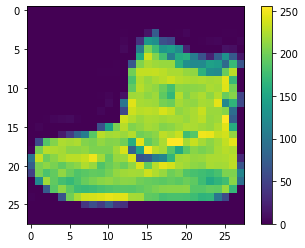

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

This is more data than we need to successfully classify, so we'll scale them to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [6]:
# scale training data
train_images = train_images / 255.0
# scale testing data
test_images = test_images / 255.0

Here's what the same image looks like after color value reduction. 

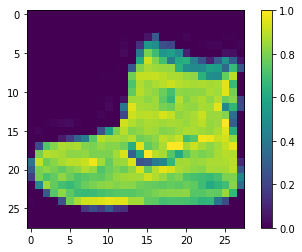

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

As you can see, the color value rendering of the image hasn't changes much to the naked eye.  But it is now computationally smaller and will process faster.



Take a look at a larger sample of the images to make sure they still look good.

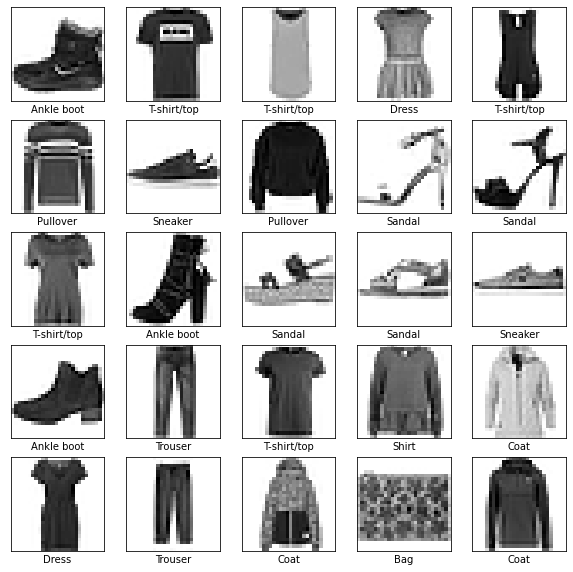

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Configure The Model

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [9]:
# instantiate the model with parameters
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer return an array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

Once we've defined the model, we have to 'compile' it to prepare it for use.  This is the step that truly bring the model into being.  The parameters of our compilation are as follows:


    Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
    Optimizer —This is how the model is updated based on the data it sees and its loss function.
    Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [10]:
# compile the model for use
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model

Training the neural network model requires the following steps:

    Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
    The model learns to associate images and labels.
    You ask the model to make predictions about a test set—in this example, the test_images array.
    Verify that the predictions match the labels from the test_labels array.


In [11]:
# fit the model to the training set (fit goes
# both ways for trained models.  First we fit
# the model to ground truth, then we fit our
# test object to the model.). The 'epochs' param
# established how many times the training should
# cycle images through the network
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4980 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3762 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2815 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2576 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2477 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

# Make Predictions

With the model trained, you can use it to make predictions about some images. The modela complex matrix of values that are diffiult to interpret. In order to make it easier to understand the prediction, we attach a final "softmax" (the name of the redudtion algorithm) layer to convert the matrix values to probabilities, which are easier to interpret. 

In [12]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

Now we input our test images to get predictions.

In [13]:
# run the model with test images.
predictions = probability_model.predict(test_images)

A prediction is an array of 10 numbers.  There is one element in the array for each of the class that we trained the model to recognize.  Each of the ten numbers in the prediction array indicate the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.

First we'll look at the raw data in the predictions matrix for a single item.

In [14]:
# print the prediction for the first test image
# to see the prediction result for that image.
predictions[0]

array([2.3886884e-08, 4.7985793e-10, 3.9944786e-10, 1.6904325e-11,
       6.7254202e-09, 5.6000432e-04, 6.0289068e-08, 4.4696052e-02,
       1.8668216e-07, 9.5474368e-01], dtype=float32)

You can see which label has the highest confidence value with the following command:

In [15]:
np.argmax(predictions[0])

9

Here, we'll define a couple of functions to show us the results in a more human readable form.  See if you can follow what the code is doing.  (Reading existing code is a good way to advance your own coding skill.)

In [16]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

First, let's call our function on a single test image to see what the results look like.  You can look at other predictions by changing the value of the indix variable, "i", and running the cell again.

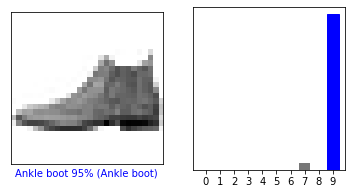

In [17]:
# plot the prediction for a single test image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's now look at results for several of the test imgages.

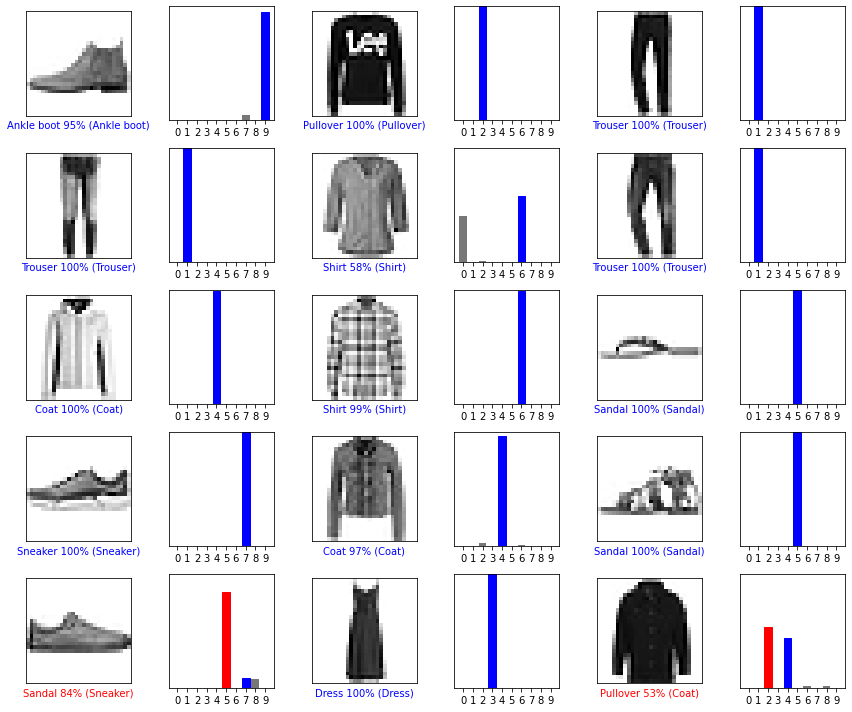

In [18]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


Single Image Prediction

In [19]:
# Grab an image from the test dataset.
img = test_images[1]

tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [20]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

Now predict the label for the image

In [21]:
predictions_single = probability_model.predict(img)

Look at the prediction Results

In [22]:
print(predictions_single)

[[3.5443703e-05 1.2181330e-13 9.9963319e-01 2.4819575e-11 2.9783766e-04
  5.2060814e-11 3.3526969e-05 5.8832300e-14 1.7271103e-10 5.5119581e-15]]


Plot the Result

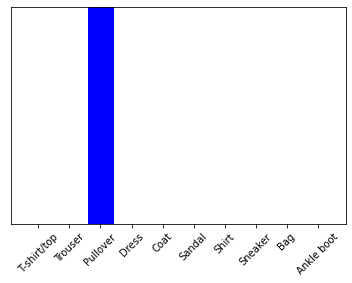

In [23]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

<font size="1">
This workbook is based heavily on the TensorFlow ML basics with Keras tutorial on [Basic image classification](https://www.tensorflow.org/tutorials/keras/classification) and is similarly made available under the MIT license:


> <font size="1">\# MIT License
> \#
> \# Copyright (c) 2017 François Chollet
> \#
> \# Permission is hereby granted, free of charge, to any person obtaining a
> \# copy of this software and associated documentation files (the "Software"),
> \# to deal in the Software without restriction, including without limitation
> \# the rights to use, copy, modify, merge, publish, distribute, sublicense,
> \# and/or sell copies of the Software, and to permit persons to whom the
> \# Software is furnished to do so, subject to the following conditions:
> \#
> \# The above copyright notice and this permission notice shall be included in
> \# all copies or substantial portions of the Software.
> \#
> \# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
> \# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
> \# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
> \# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
> \# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
> \# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
> \# DEALINGS IN THE SOFTWARE.


